In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
data_1=pd.read_csv(r"C:\Users\sivateja_k\Desktop\Detecting-Adversarial-Attacks-on-Artificial-Neural-Networks-Using-Performance-Counters\MNIST\output_10_1.csv",skiprows =1)
data_2=pd.read_csv(r"C:\Users\sivateja_k\Desktop\Detecting-Adversarial-Attacks-on-Artificial-Neural-Networks-Using-Performance-Counters\MNIST\output_10_2.csv",skiprows =1)


In [4]:
data_li=[data_1,data_2]
data_dict={}
j=0
for data in data_li:
    row_1=data.iloc[:,0]
    instructions_li=[list(data.columns)[0]]
    branches_li=[]
    llc_load_misses_li=[]
    dtlb_load_misses_li=[]
    for i in range(9,len(row_1),10):
        instructions_li.append(row_1[i])
    for i in range(0,len(row_1),10):
        branches_li.append(row_1[i])
    for i in range(4,len(row_1),10):
        llc_load_misses_li.append(row_1[i])
    for i in range(7,len(row_1),10):
        dtlb_load_misses_li.append(row_1[i])
    data_dict[j]={"instructions":instructions_li,"branches":branches_li,
                    "llc_load_misses":llc_load_misses_li,"dtlb_load_misses":dtlb_load_misses_li}
    j+=1

In [5]:
data_frames_li=[]
for k,v in data_dict.items():
    sample_df=pd.DataFrame({"Instructions":v["instructions"]}, columns=["Instructions"])
    sample_df["Branches"]=v["branches"]
    sample_df["LLc Load Misses"]=v["llc_load_misses"]
    sample_df["Dtlb Load Misses"]=v["dtlb_load_misses"]
    data_frames_li.append(sample_df)

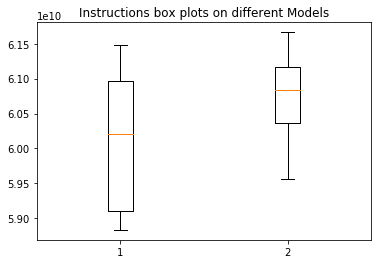

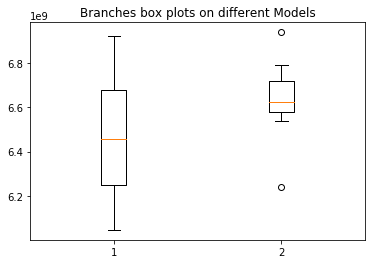

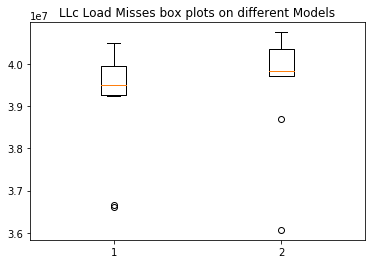

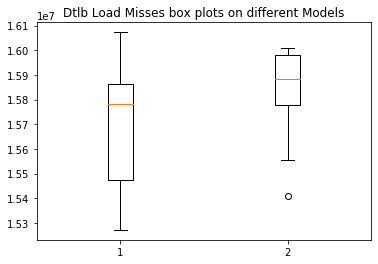

In [6]:
#branches box plot
params=["Instructions","Branches","LLc Load Misses","Dtlb Load Misses"]
for k in range(0,4):
    clean_clean=list(data_frames_li[0].iloc[:,[k]][params[k]])
    clean_adversial=list(data_frames_li[1].iloc[:,[k]][params[k]])
    df=pd.DataFrame({"clean_clean":clean_clean}, columns=[params[k]])
    df["clean_adversial"]=clean_adversial
    clean_clean_int=[]
    for ele in clean_clean:
        clean_clean_int.append(int(ele))
    clean_adversial_int=[]
    for ele in clean_adversial:
        clean_adversial_int.append(int(ele))
    adversial_clean_int=[]
    data=[clean_clean_int,clean_adversial_int]
    fig7, ax7 = plt.subplots()
    ax7.set_title(params[k]+' box plots on different Models')
    ax7.boxplot(data)
    plt.show()
    fig7.savefig("plot"+str(k)+".jpeg",bbox_inches='tight')
    plt.close(fig7)